In [1]:
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.constants import hbar, h, c, eps0, e, a0
import matplotlib.pyplot as plt

from sympy.physics.wigner import wigner_3j, wigner_6j

from LightMat import Atom, GaussianBeam, Lattice1d, BowtieLattice2d, LaserSetup, interactive_plot

In [2]:
w0 = 175 * u.um
lambda_ = 1064 * u.nm
P = 11 * u.W

bowtie = BowtieLattice2d(
    lattice_direction_vec1=(1,0,0),
    lattice_direction_vec2=(0,1,0),
    pol_Jones_vec='linear vertical', # linear vertical
    lambda_=lambda_,
    w0=w0,
    P=2*P,
    z0=0,
    name='2d Bowtie x-y',
)

lat1d_x = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=0,
    pol_Jones_vec='linear horizontal', # linear horizontal
    lambda_=lambda_,
    w0=w0,
    P=P,
    z0=0,
    name='1D Lattice x',
)
lat1d_y = Lattice1d(
    lattice_direction_vec=(0,1,0),
    intersect_angle=0,
    pol_Jones_vec='linear horizontal', # linear horizontal
    lambda_=lambda_,
    w0=w0,
    P=P,
    z0=0,
    name='1D Lattice y',
)

w0_z = 50 * u.um
lambda_z = 866 * u.nm
P_z = 0.5 * u.W
angle = 165

lat1d_z = Lattice1d(   
    lattice_direction_vec=(0,0,1),
    intersect_angle=angle,
    intersect_axis=(-1,1,0),
    pol_Jones_vec='linear horizontal', # linear horizontal
    lambda_=lambda_z,
    w0=w0_z,
    P=P_z,
    z0=0,
    name='1D Shallow-angle Lattice z',
)


w0_ls = [300, 10] * u.um
lambda_ls = 1064 * u.nm
P_ls = 3 * u.W

lightsheet = GaussianBeam(
    beam_direction_vec=(1,1,0),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_ls,
    w0=w0_ls,
    P=P_ls,
    z0=0,
    name='Light Sheet',
)


w0_rm = 700 * u.um
lambda_rm = (c / ((c/(770.108385049*u.nm)).to(u.GHz)  - 50*u.GHz)).to(u.nm) # see Tiecke
P_rm1 = 50 * u.mW
P_rm2 = 50 * u.mW


raman1 = GaussianBeam(
    beam_direction_vec=(1,0,-0.2),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_rm,
    w0=w0_rm,
    P=P_rm1,
    z0=0,
    name='Raman 1',
)

raman2 = GaussianBeam(
    beam_direction_vec=(0,1,-0.2),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_rm,
    w0=w0_rm,
    P=P_rm2,
    z0=0,
    name='Raman 2',
)

In [3]:
hfs_state = {'n': 4, 'L': 's', 'J': 1/2, 'F': 9/2, 'mF': -9/2, 'I': 4,}
atom = Atom('K', hfs_state=hfs_state)

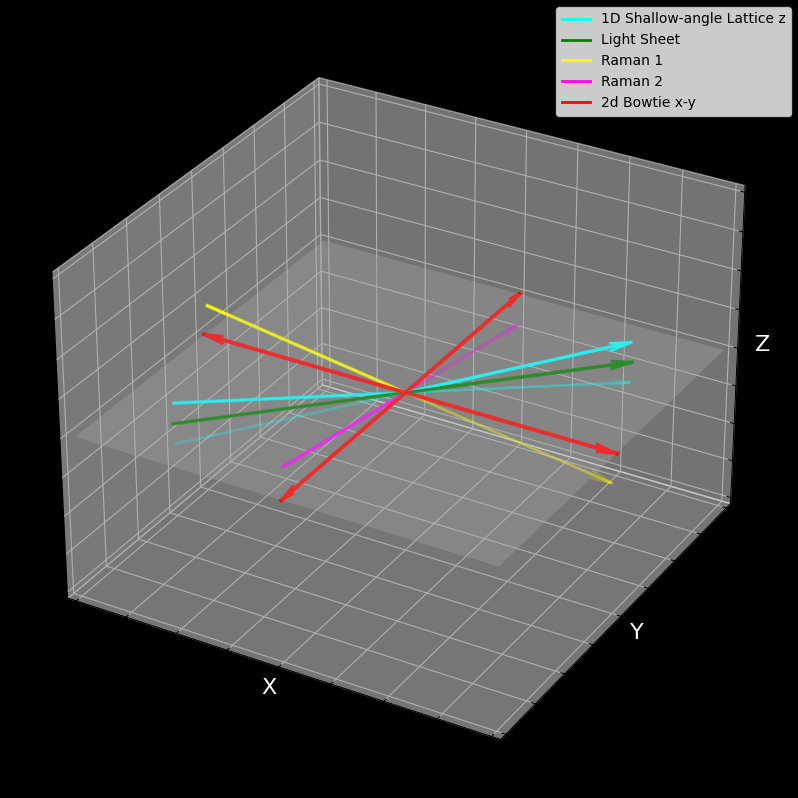

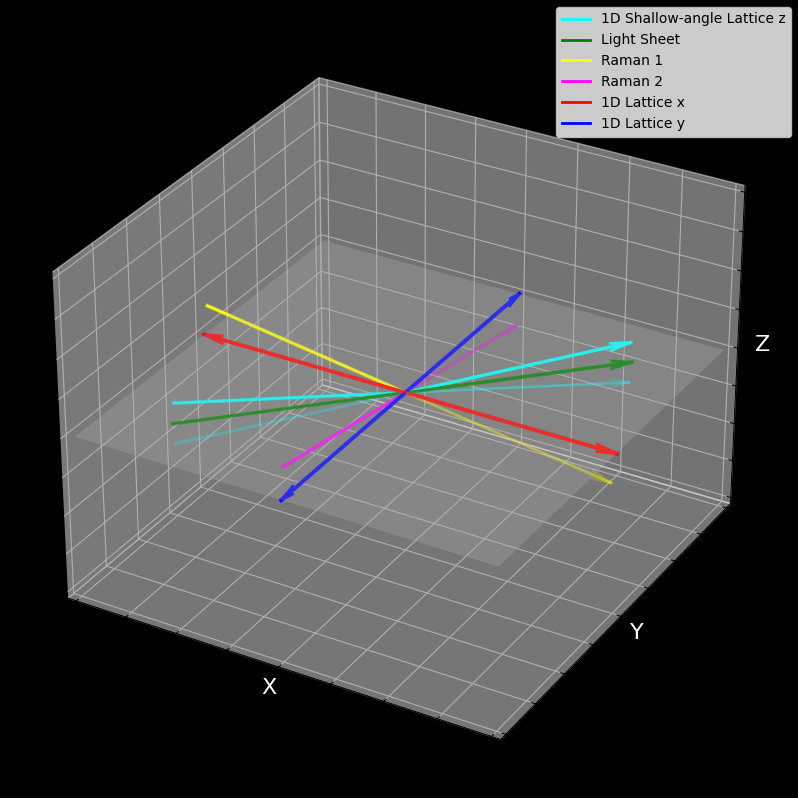

In [4]:
bowtie_setup = LaserSetup(
    lasers=[lat1d_z, lightsheet, raman1, raman2, bowtie],
    atom=atom,
)

regular_setup = LaserSetup(
    lasers=[lat1d_z, lightsheet, raman1, raman2, lat1d_x, lat1d_y],
    atom=atom,
)

bowtie_setup.plot_beams()
regular_setup.plot_beams()

lat1d_z_setup = LaserSetup(lasers=[lat1d_z], atom=atom)
lightsheet_setup = LaserSetup(lasers=[lightsheet], atom=atom)
raman1_setup = LaserSetup(lasers=[raman1], atom=atom)
raman2_setup = LaserSetup(lasers=[raman2], atom=atom)
bowtie_setup = LaserSetup(lasers=[bowtie], atom=atom)
lat1d_x_setup = LaserSetup(lasers=[lat1d_x], atom=atom)
lat1d_y_setup = LaserSetup(lasers=[lat1d_y], atom=atom)

In [5]:
n = 151

x = np.linspace(-1, 1, n) * u.um
y = np.linspace(-1, 1, n) * u.um
z = np.linspace(-5, 5, n) * u.um

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

In [6]:
V_lat1d_z = lat1d_z_setup.V(X, Y, Z)
V_lightsheet = lightsheet_setup.V(X, Y, Z)
V_raman1 = raman1_setup.V(X, Y, Z)
V_raman2 = raman2_setup.V(X, Y, Z)
V_bowtie = bowtie_setup.V(X, Y, Z)
V_lat1d_x = lat1d_x_setup.V(X, Y, Z)
V_lat1d_y = lat1d_y_setup.V(X, Y, Z)

Calculating electric field amplitude of laser 1D Shallow-angle Lattice z...
Calculating polarizability of hfs state {'n': 4, 'L': 's', 'J': 0.5, 'F': 4.5, 'mF': -4.5, 'I': 4} at λ=866.0 nm...
Calculating electric field amplitude of laser Light Sheet...
Calculating polarizability of hfs state {'n': 4, 'L': 's', 'J': 0.5, 'F': 4.5, 'mF': -4.5, 'I': 4} at λ=1064.0 nm...
Calculating electric field amplitude of laser Raman 1...
Calculating polarizability of hfs state {'n': 4, 'L': 's', 'J': 0.5, 'F': 4.5, 'mF': -4.5, 'I': 4} at λ=770.2073106711007 nm...
Calculating electric field amplitude of laser Raman 2...
Calculating polarizability of hfs state {'n': 4, 'L': 's', 'J': 0.5, 'F': 4.5, 'mF': -4.5, 'I': 4} at λ=770.2073106711007 nm...
Calculating electric field amplitude of laser 2d Bowtie x-y...
Calculating polarizability of hfs state {'n': 4, 'L': 's', 'J': 0.5, 'F': 4.5, 'mF': -4.5, 'I': 4} at λ=1064.0 nm...
Calculating electric field amplitude of laser 1D Lattice x...
Calculating polari

In [12]:
bowtie.pol_vec_3d = np.array([0, 1, 0])
V_bowtie = bowtie_setup.V(X, Y, Z)

Calculating electric field amplitude of laser 2d Bowtie x-y...
Calculating polarizability of hfs state {'n': 4, 'L': 's', 'J': 0.5, 'F': 4.5, 'mF': -4.5, 'I': 4} at λ=1064.0 nm...


In [14]:
bowtie.pol_vec_3d 

array([0, 1, 0])

In [13]:
interactive_plot(
    [V_lat1d_x+V_lat1d_y, V_bowtie], 
    x, y, z, 
    #title=['Regular configuration', 'Bowtie configuration'], 
    #cbar_title='V [h x MHz]',
)

Output()

In [16]:
interactive_plot([V_lat1d_z+V_lightsheet, V_lightsheet], x, y, z, title=['1D Lattice z + Light Sheet', 'Light Sheet'], cbar_title='V [h x MHz]')

Output()